In [ ]:
#default_exp screen

# Screen

> API details.

In [ ]:
#export
from abc import ABC,abstractmethod

In [ ]:
#export
class ScreenABC(ABC):
    @abstractmethod
    def get_screen_size(self): 
        "Return the `size` of the screen: [screen_width, screen_height]"

In [ ]:
class MockScreen(ScreenABC):
    def get_screen_size(self):
        return [1024, 768]

In [ ]:
s = MockScreen()
assert s.get_screen_size() == [1024, 768]

## Convert a point on a screen to a "zone"

"zones" tell us how far the cursor is from the center of the screen.

The following image shows how a display could be divided into 3 zones;

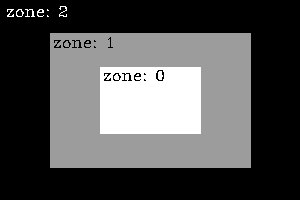

In [ ]:
#hide_input
import numpy as np
import cv2
from IPython.display import display, Image
width, height = 300, 200
image = np.zeros((height, width, 1), np.uint8)
image = cv2.rectangle(image, [width//2-100, height//2-67], [width//2+100, height//2+67], 156, -1)
image = cv2.rectangle(image, [width//2-50, height//2-33], [width//2+50, height//2+33], 256, -1)
cv2.putText(image,"zone: 0", (102,80), cv2.FONT_HERSHEY_COMPLEX, .5, 0)
cv2.putText(image,"zone: 1", (52,47), cv2.FONT_HERSHEY_COMPLEX, .5, 0)
cv2.putText(image,"zone: 2", (5,16), cv2.FONT_HERSHEY_COMPLEX, .5, 256)
display(Image(cv2.imencode('.png', image)[1].tobytes()))

In [ ]:
#export
def to_screen_zone(screen_size, point):
    "Return the zone of a `point` within a screen"
    #TODO: we're assuming screen is landscape 
    screen_center = [i//2 for i in screen_size]
    distances = [abs(a-b) for a,b in zip(point,screen_center)]
    distances[0] = distances[0] // (screen_size[0] // screen_size[1])
    return distances[0] if distances[0] > distances[1] else distances[1]

This function uses the most granular zone strategy possible. The total number of zones will be ~half the screen height.

In [ ]:
for i in range(6):
    assert i == to_screen_zone([100,10], [50,5+i])
for i in range(6):
    for j in range(10):
        assert i == to_screen_zone([100,10], [50+(i*10)+j,5])

# Windows specific implementations

In [ ]:
#export
def new_windows_screen():
    import win32api
    class WindowsScreen(ScreenABC):
        def get_screen_size(self):
            return win32api.GetSystemMetrics(0), win32api.GetSystemMetrics(1)
    return WindowsScreen()

```
new_windows_screen().get_screen_size()
```